# Medical Insurance Cost Prediction

In [1]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# loading csv
insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Categorical Features:**
- Sex
- Smoker
- Region

In [11]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [13]:
# statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age Distribution')

<Figure size 600x600 with 0 Axes>

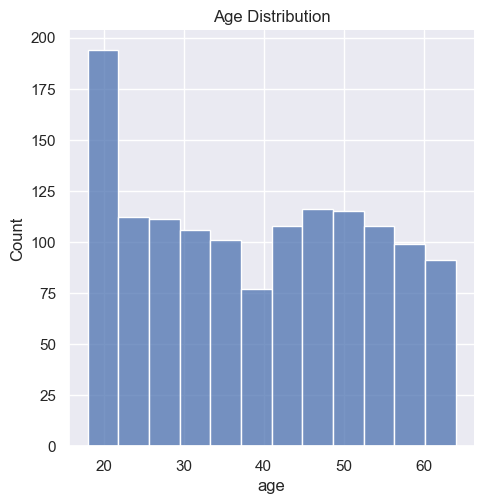

In [29]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Sex Distribution')

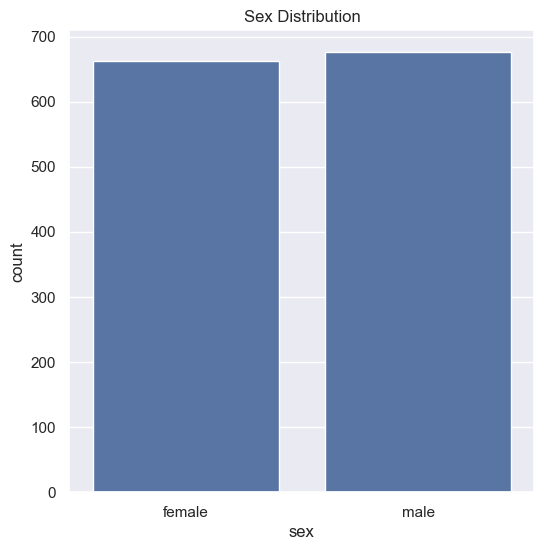

In [30]:
# distribution of gender column 
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')

In [31]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Text(0.5, 1.0, 'BMI Distribution')

<Figure size 600x600 with 0 Axes>

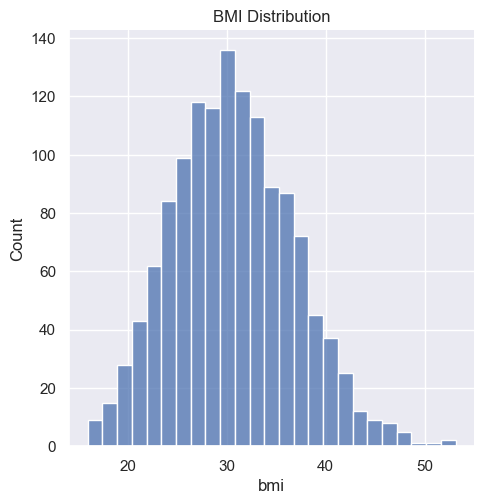

In [32]:
# BMI Distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')

**Normal BMI Range --> 18.5 to 24.9**

Text(0.5, 1.0, 'Children')

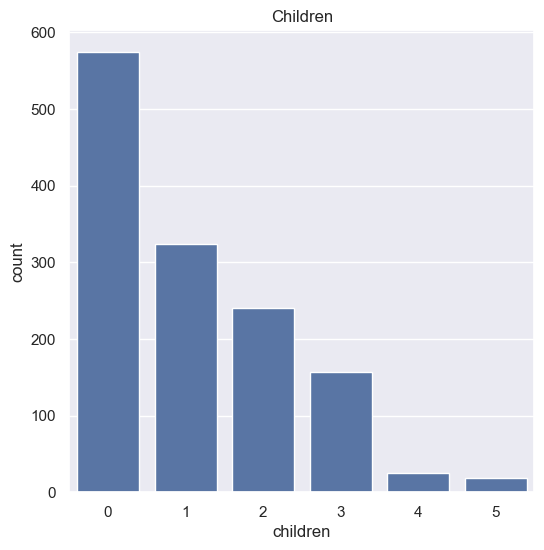

In [34]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')

In [35]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Text(0.5, 1.0, 'Smoker')

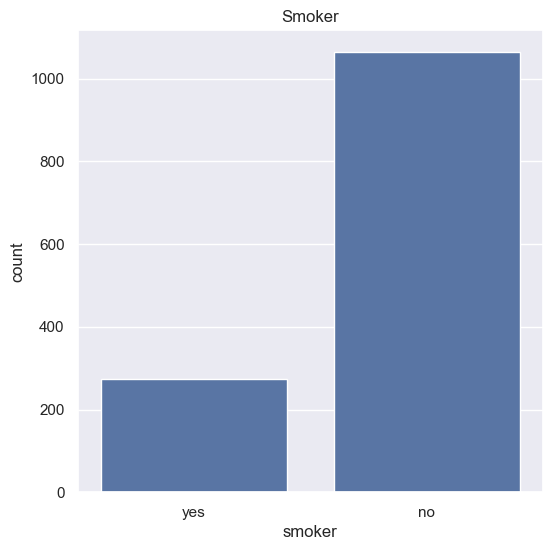

In [36]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker')

In [37]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Text(0.5, 1.0, 'Region')

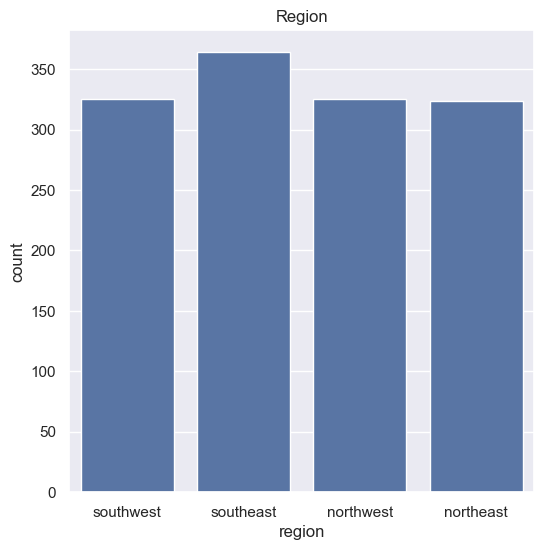

In [38]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region')

In [39]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Text(0.5, 1.0, 'Charge Distribution')

<Figure size 600x600 with 0 Axes>

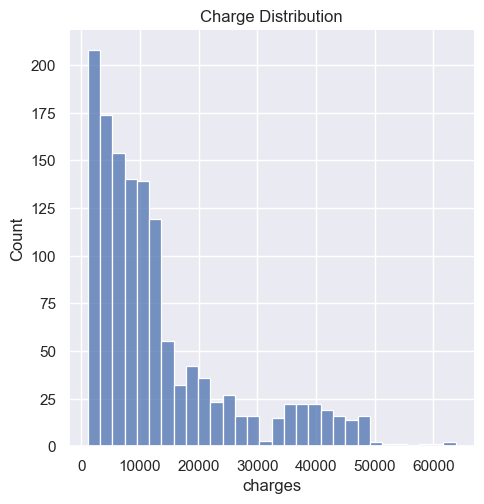

In [40]:
# Charges Distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charge Distribution')

## Data Preprocessing

***Encoding the categorical features***

In [44]:
# encoding 'sex' column
insurance_dataset.replace({'sex':{'male': 0, 'female': 1}}, inplace=True)

#encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes': 0, 'no': 1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Splitting the Features and Target

In [45]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y= insurance_dataset['charges']

In [46]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [47]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Train and Test Data Split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Model Training

In [50]:
regressor = LinearRegression()

In [51]:
regressor.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation 

In [52]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [54]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value: ', r2_train)

R squared value:  0.751505643411174


In [55]:
# prediction on testing data
test_data_prediction = regressor.predict(X_test)

In [56]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value: ', r2_test)

R squared value:  0.7447273869684077


## Building a Predictive System

In [58]:
input_data = (30,0,35.3,0,0,1)

input_data_df = pd.DataFrame([input_data], columns=X.columns)

# Prediction
prediction = regressor.predict(input_data_df)

print('The insurance cost is USD', prediction[0])

The insurance cost is USD 30783.861744967013
